# Variation of Magnitudes bias vrt Airmass

- author Sylvie Dagoret-Campagne

In [19]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [20]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [21]:
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")

/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [22]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [23]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Variation with respect to pwv

In [24]:
am= [1.,1.2, 1.4,1.6,1.8,2.0]

In [25]:
pwv=[5.05,4.95,4.84,4.84,4.74,4.74]

In [26]:
err_pwv=0.75

/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


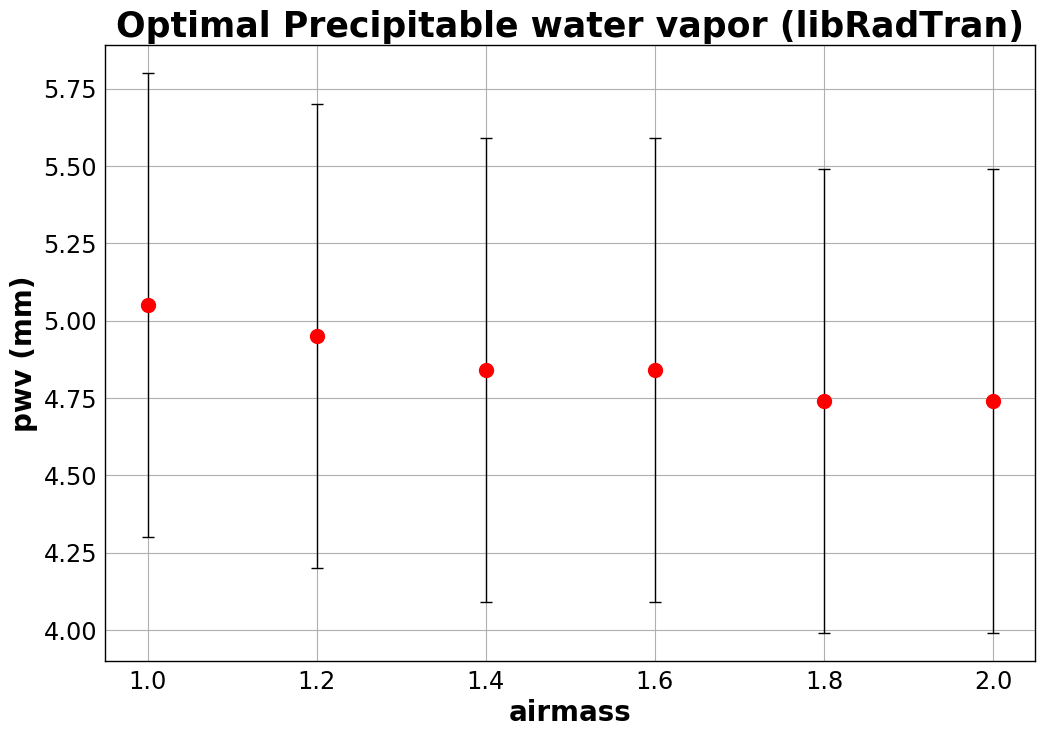

In [27]:
plt.errorbar(am,pwv,yerr=0.75,fmt='o',color='red',markersize='10', ecolor='black',capsize=4)
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("pwv (mm)",fontweight='bold',fontsize=20)
plt.title("Optimal Precipitable water vapor (libRadTran)",fontweight='bold',fontsize=25)
plt.grid(True)

# Variation with respect to ozone

In [28]:
am= [1.,1.2, 1.4,1.6,1.8,2.0]

In [29]:
#o3=[346.9,350.0,341.1,339.2,339.2,335.3]
o3=[346.9,343.5,341.1,339.2,339.2,335.3]  # correct value for z=1.2

In [30]:
err_o3=50.

/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


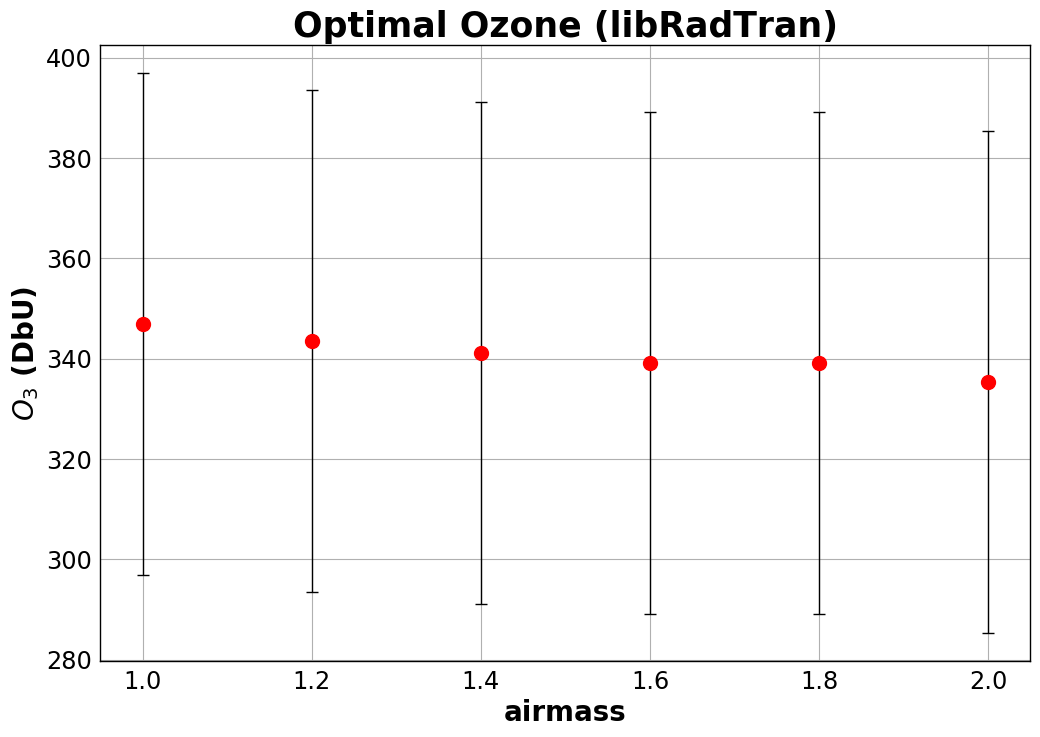

In [31]:
plt.errorbar(am,o3,yerr=err_o3,fmt='o',color='red',markersize='10', ecolor='black',capsize=4)
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$O_3$ (DbU)",fontweight='bold',fontsize=20)
plt.title("Optimal Ozone (libRadTran)",fontweight='bold',fontsize=25)
plt.grid(True)

# Delta M

In [32]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=len(am))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# z 1,1.2,1.4,1.6,1.8,2.0

In [33]:
Delta_M_pwv_Y=[0.78,0.28,0.54,0.72,1.02,-0.09]
Err_M_pwv_Y=[0.19,0.19,0.19,0.22,0.2,0.22]

Delta_M_pwv_Z=[0.81,1.06,1.34,1.06,1.59,1.28]
Err_M_pwv_Z=[0.07,0.07,0.07,0.09,0.08,0.09]

Delta_M_pwv_I=[5.16,5.19,5.18,4.92,5.15,4.83]
Err_M_pwv_I=[0.27,0.31,0.34,0.37,0.4,0.41]

Delta_M_pwv_R=[4.37,5.06,5.57,6.04,6.76,6.96]
Err_M_pwv_R=[0.09,0.09,0.08,0.08,0.08,0.08]


/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


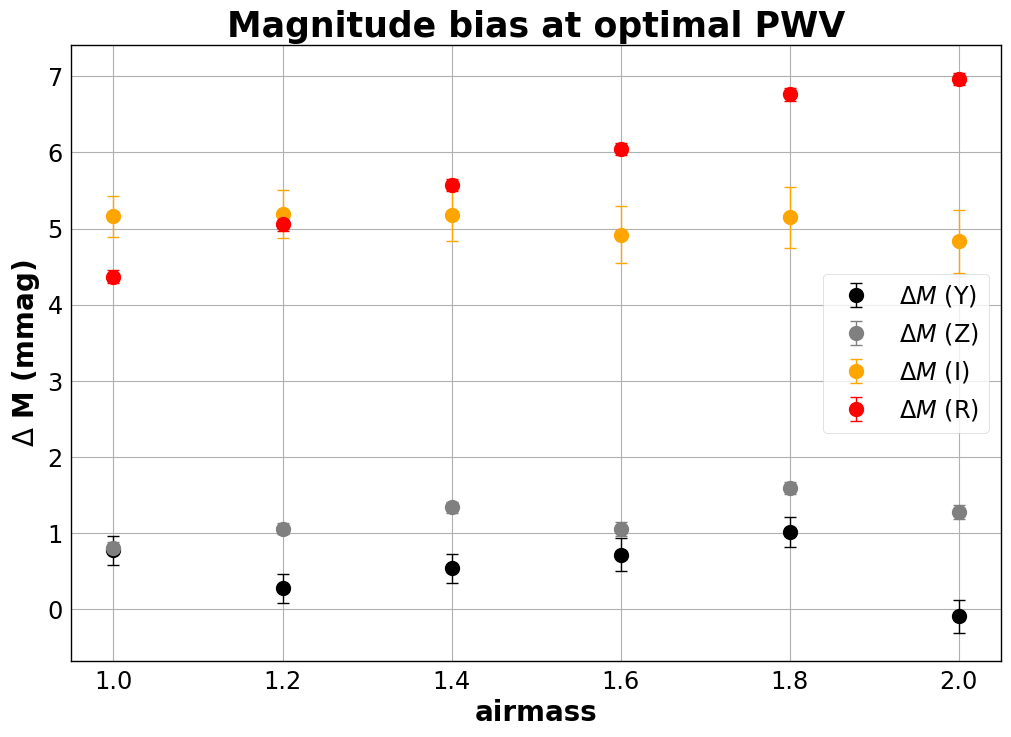

In [34]:
plt.errorbar(am,Delta_M_pwv_Y,yerr=Err_M_pwv_Y,fmt='o',color='black',markersize='10', ecolor='black',capsize=4,label="$\Delta M$ (Y)")
plt.errorbar(am,Delta_M_pwv_Z,yerr=Err_M_pwv_Z,fmt='o',color='grey',markersize='10', ecolor='grey',capsize=4,label="$\Delta M$ (Z)")
plt.errorbar(am,Delta_M_pwv_I,yerr=Err_M_pwv_I,fmt='o',color='orange',markersize='10', ecolor='orange',capsize=4,label="$\Delta M$ (I)")
plt.errorbar(am,Delta_M_pwv_R,yerr=Err_M_pwv_R,fmt='o',color='red',markersize='10', ecolor='red',capsize=4,label="$\Delta M$ (R)")
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$\Delta$ M (mmag)",fontweight='bold',fontsize=20)
plt.title("Magnitude bias at optimal PWV",fontweight='bold',fontsize=25)
plt.grid(True)
plt.legend()

In [35]:
Delta_M_o3_U=[1.83,2.18,1.9,1.74,2.63,1.46]
Err_M_o3_U=[0.02,0.03,0.3,0.3,0.05,0.03]

Delta_M_o3_G=[0.,0.15,0.08,0.05,0.17,0.08]
Err_M_o3_G=[0.06,0.09,0.05,0.03,0.04,0.05]

Delta_M_o3_R=[0.04,0.22,0.06,0.2,0.14,0.33]
Err_M_o3_R=[0.26,0.3,0.28,0.27,0.28,0.27]

Delta_M_o3_I=[4.79,4.44,4.13,3.81,3.55,3.16]
Err_M_o3_I=[0.24,0.26,0.29,0.31,0.33,0.34]

/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


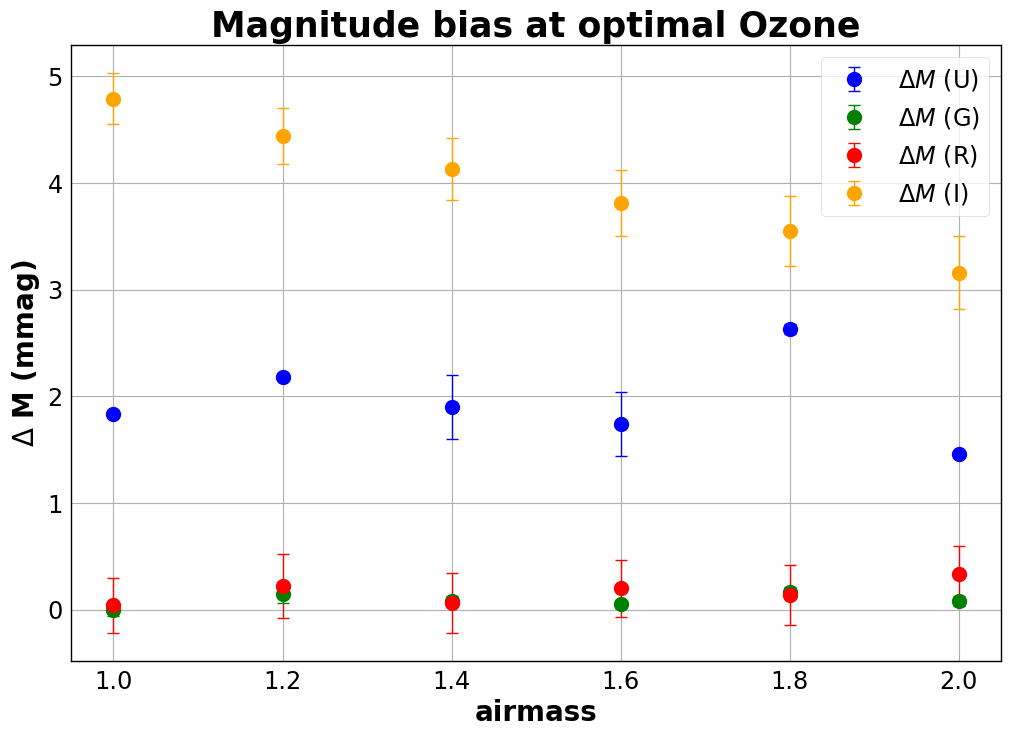

In [36]:
plt.errorbar(am,Delta_M_o3_U,yerr=Err_M_o3_U,fmt='o',color='blue',markersize='10', ecolor='blue',capsize=4,label="$\Delta M$ (U)")
plt.errorbar(am,Delta_M_o3_G,yerr=Err_M_o3_G,fmt='o',color='green',markersize='10', ecolor='green',capsize=4,label="$\Delta M$ (G)")
plt.errorbar(am,Delta_M_o3_R,yerr=Err_M_o3_R,fmt='o',color='red',markersize='10', ecolor='red',capsize=4,label="$\Delta M$ (R)")
plt.errorbar(am,Delta_M_o3_I,yerr=Err_M_o3_I,fmt='o',color='orange',markersize='10', ecolor='orange',capsize=4,label="$\Delta M$ (I)")
plt.grid()
plt.xlabel("airmass",fontweight='bold',fontsize=20)
plt.ylabel("$\Delta$ M (mmag)",fontweight='bold',fontsize=20)
plt.title("Magnitude bias at optimal Ozone",fontweight='bold',fontsize=25)
plt.grid(True)
plt.legend()